# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
print(cities)

['hermanus', 'kapaa', 'yellowknife', 'pingliang', 'port alfred', 'dikson', 'pangkalanbuun', 'flin flon', 'punta arenas', 'rikitea', 'cavalcante', 'samalaeulu', 'bourges', 'ejura', 'saint-philippe', 'mataura', 'reynosa', 'ponta do sol', 'corrales', 'bethel', 'arraial do cabo', 'innisfail', 'chalmette', 'avarua', 'araguatins', 'kaitangata', 'airai', 'kruisfontein', 'bubaque', 'butaritari', 'severo-kurilsk', 'cape town', 'taolanaro', 'busselton', 'ushuaia', 'necochea', 'hilo', 'shingu', 'hithadhoo', 'khatanga', 'albany', 'tabiauea', 'kuito', 'utiroa', 'paris', 'port elizabeth', 'hambantota', 'severo-yeniseyskiy', 'dakar', 'vaini', 'nizhneyansk', 'barentsburg', 'andrelandia', 'nikolskoye', 'manakara', 'sile', 'tasiilaq', 'azimur', 'raudeberg', 'saint george', 'ribeira grande', 'alice springs', 'east london', 'malinovoye ozero', 'bluff', 'nanortalik', 'penzance', 'bartica', 'yarim', 'waspan', 'sorland', 'san patricio', 'muravlenko', 'hasaki', 'pisco', 'popondetta', 'mahebourg', 'tessaoua', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Weather variables
url = "http://api.openweathermap.org/data/2.5/weather?"
city = ""
recordcount = 0

cities_test = ['ushuaia', 'punta arenas', 'prizren']

#Storage Variables
city = []
lat = []
lng = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []

for c in cities_test:
    try:
        recordcount = recordcount + 1
        query_url = url + "appid=" + api_key + "&q=" + c
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_t = weather_json["name"]
        #print(weather_json)
        country_t = weather_json["sys"]["country"]
        lat_t = weather_json["coord"]["lat"]
        lng_t = weather_json["coord"]["lon"]
        cloudiness_t = weather_json["clouds"]["all"]
        date_t = weather_json["dt"]
        humidity_t = weather_json["main"]["humidity"]
        max_temp_t = weather_json["main"]["temp_max"]
        wind_speed_t = weather_json["wind"]["speed"]
        lat.append(lat_t)
        city.append(city_t)
        lng.append(lng_t)
        cloudiness.append(cloudiness_t)
        country.append(country_t)
        date.append(date_t)
        humidity.append(humidity_t)
        max_temp.append(max_temp_t)
        wind_speed.append(wind_speed_t)
        print(f"Processing record {recordcount} | {c}")
    except:
        recordcout = recordcount + 1
        print(f"Error with Record {recordcount}, continuing...")

Processing record 1 | ushuaia
Processing record 2 | punta arenas
Error with Record 3, continuing...


In [4]:
print(city)

['Ushuaia', 'Punta Arenas']


In [5]:
#Weather variables
url = "http://api.openweathermap.org/data/2.5/weather?"
city = ""
recordcount = 0

#Storage Variables
city = []
lat = []
lng = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []

for c in cities:
    try:
        recordcount = recordcount + 1
        query_url = url + "appid=" + api_key + "&q=" + c
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_t = weather_json["name"]
        #print(weather_json)
        country_t = weather_json["sys"]["country"]
        lat_t = weather_json["coord"]["lat"]
        lng_t = weather_json["coord"]["lon"]
        cloudiness_t = weather_json["clouds"]["all"]
        date_t = weather_json["dt"]
        humidity_t = weather_json["main"]["humidity"]
        max_temp_t = weather_json["main"]["temp_max"]
        wind_speed_t = weather_json["wind"]["speed"]
        lat.append(lat_t)
        city.append(city_t)
        lng.append(lng_t)
        cloudiness.append(cloudiness_t)
        country.append(country_t)
        date.append(date_t)
        humidity.append(humidity_t)
        max_temp.append(max_temp_t)
        wind_speed.append(wind_speed_t)
        print(f"Processing record {recordcount} | {c}")
    except:
        recordcout = recordcount + 1
        print(f"Error with Record {recordcount}, continuing...")

Processing record 1 | hermanus
Processing record 2 | kapaa
Processing record 3 | yellowknife
Processing record 4 | pingliang
Processing record 5 | port alfred
Processing record 6 | dikson
Processing record 7 | pangkalanbuun
Processing record 8 | flin flon
Processing record 9 | punta arenas
Processing record 10 | rikitea
Processing record 11 | cavalcante
Error with Record 12, continuing...
Processing record 13 | bourges
Processing record 14 | ejura
Processing record 15 | saint-philippe
Processing record 16 | mataura
Processing record 17 | reynosa
Processing record 18 | ponta do sol
Processing record 19 | corrales
Processing record 20 | bethel
Processing record 21 | arraial do cabo
Processing record 22 | innisfail
Processing record 23 | chalmette
Processing record 24 | avarua
Error with Record 25, continuing...
Processing record 26 | kaitangata
Processing record 27 | airai
Processing record 28 | kruisfontein
Processing record 29 | bubaque
Processing record 30 | butaritari
Processing reco

Processing record 247 | chokurdakh
Processing record 248 | puerto ayora
Processing record 249 | san cristobal
Processing record 250 | xining
Processing record 251 | sao domingos
Processing record 252 | sitka
Processing record 253 | malpe
Processing record 254 | ginir
Processing record 255 | coahuayana
Processing record 256 | san andres
Processing record 257 | khromtau
Processing record 258 | waddan
Processing record 259 | saldanha
Processing record 260 | constitucion
Processing record 261 | torbay
Processing record 262 | weligama
Processing record 263 | barga
Processing record 264 | evanston
Processing record 265 | lorengau
Processing record 266 | nago
Processing record 267 | bodden town
Processing record 268 | heihe
Processing record 269 | punta cardon
Processing record 270 | ati
Processing record 271 | kawhia
Processing record 272 | katsuura
Processing record 273 | whakatane
Processing record 274 | karratha
Processing record 275 | lashio
Processing record 276 | itarema
Processing rec

Error with Record 492, continuing...
Processing record 493 | faya
Processing record 494 | san juan evangelista
Processing record 495 | victoria
Processing record 496 | saint-gabriel
Processing record 497 | atambua
Processing record 498 | salalah
Error with Record 499, continuing...
Processing record 500 | ogulin
Processing record 501 | australind
Processing record 502 | rio cuarto
Processing record 503 | balkhash
Processing record 504 | nisia floresta
Processing record 505 | cravo norte
Processing record 506 | mae sai
Processing record 507 | sao felix do xingu
Error with Record 508, continuing...
Processing record 509 | de-kastri
Processing record 510 | sinnamary
Error with Record 511, continuing...
Processing record 512 | kurilsk
Processing record 513 | namatanai
Processing record 514 | turayf
Processing record 515 | peterhead
Processing record 516 | solnechnyy
Processing record 517 | ornskoldsvik
Processing record 518 | belaya gora
Processing record 519 | xuddur
Processing record 520

In [6]:
len(city)

563

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

weather_db = {"city": city,
              "country": country
              "lat": lat,
              "lng": lng,
              "cloudiness": cloudiness,
              "date": date,
              "humidity": humidity,
              "max_temp": max_temp
              "wind_speed": wind_speed}

weather_db

In [7]:
weather_db = pd.DataFrame({"city": city, 
              "country": country,
              "lat": lat, 
              "lng": lng, 
              "cloudiness": cloudiness, 
              "date": date, 
              "humidity": humidity, 
              "max_temp": max_temp,
              "wind_speed": wind_speed})

weather_db["max_temp"] = weather_db["max_temp"] - 273.15
weather_db["max_temp"] = (weather_db["max_temp"])*9/5 + 32
weather_db["max_temp"] = weather_db["max_temp"].astype(float).map("{:,.2f}".format)
weather_db

,city,country,lat,lng,cloudiness,date,humidity,max_temp,wind_speed
0,Hermanus,ZA,-34.42,19.24,56,1548804262,96,60.94,0.52
1,Kapaa,US,22.08,-159.32,75,1548802560,53,78.08,11.30
2,Yellowknife,CA,62.45,-114.38,20,1548799200,68,-14.80,7.20
3,Pingliang,CN,35.54,106.68,92,1548804262,81,23.09,3.02
4,Port Alfred,ZA,-33.59,26.89,88,1548804262,77,73.58,3.92
5,Dikson,RU,73.51,80.55,8,1548804262,83,-18.53,3.97
6,Pangkalanbuun,ID,-2.68,111.62,56,1548804263,96,75.38,1.52
7,Flin Flon,CA,54.77,-101.88,5,1548802800,55,-22.00,2.10
8,Punta Arenas,CL,-53.16,-70.91,40,1548802800,65,44.60,15.90
9,Rikitea,PF,-23.12,-134.97,0,1548804263,100,80.65,4.92


In [9]:
weather_db.to_csv('weather_db.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

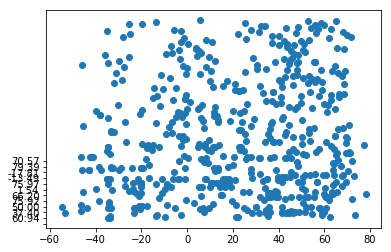

In [10]:
lat = weather_db["lat"]
max_temp = weather_db["max_temp"]
#max_temp.min()
plt.scatter(lat, max_temp, s=None, marker="o")
plt.yticks(np.arange(-10, 110, step=10))
plt.show()

#### Latitude vs. Humidity Plot

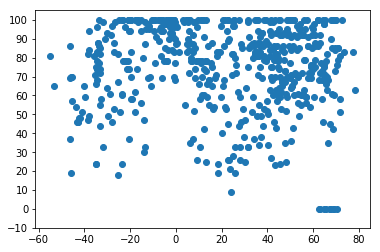

In [11]:

max_temp = weather_db["humidity"]
#max_temp.min()
plt.scatter(lat, max_temp, s=None, marker="o")
plt.yticks(np.arange(-10, 110, step=10))
plt.show()

#### Latitude vs. Cloudiness Plot

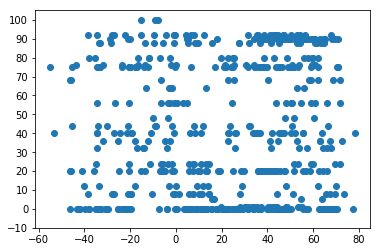

In [12]:
max_temp = weather_db["cloudiness"]
#max_temp.min()
plt.scatter(lat, max_temp, s=None, marker="o")
plt.yticks(np.arange(-10, 110, step=10))
plt.show()

#### Latitude vs. Wind Speed Plot

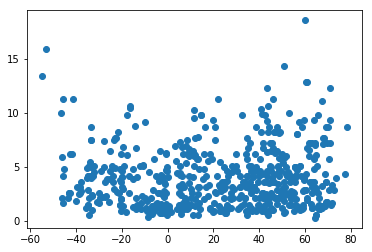

In [14]:
max_temp = weather_db["wind_speed"]
#max_temp.min()
plt.scatter(lat, max_temp, s=None, marker="o")
plt.yticks(np.arange(0, 20, step=5))
plt.show()